**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *


In [2]:
%%capture
ana_inf = InflationrateAnalysis('inflationrate_test')

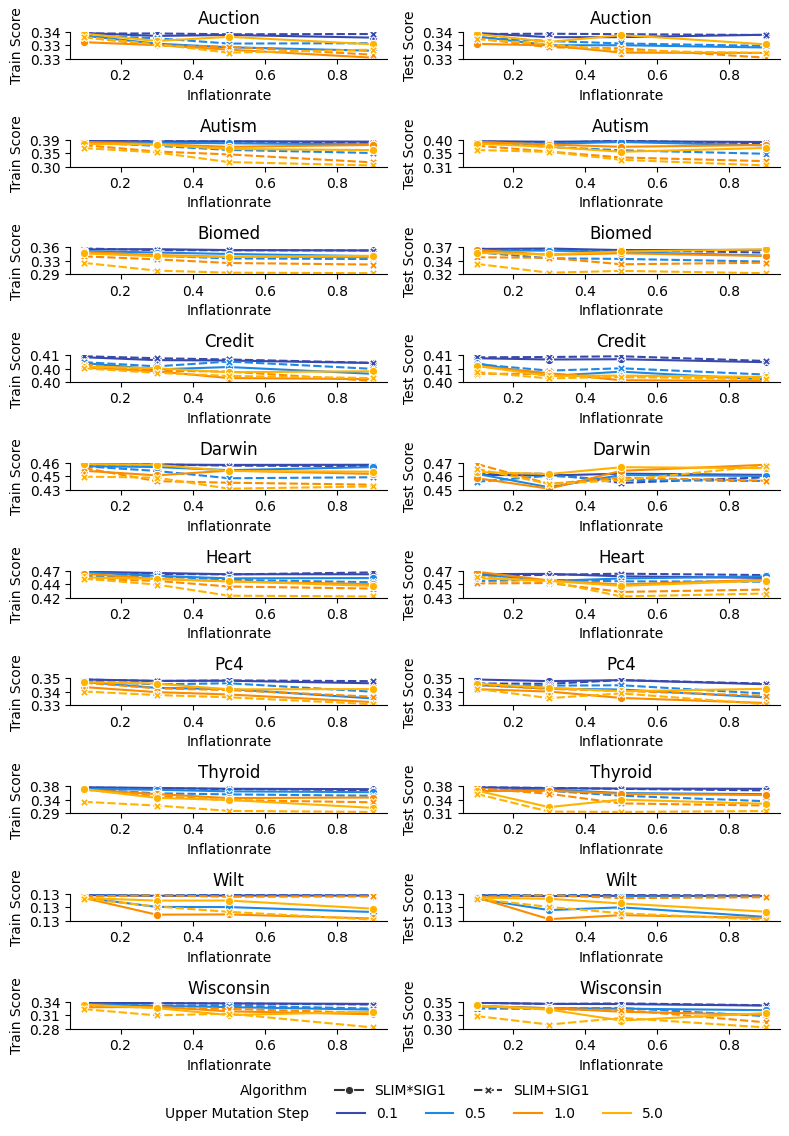

In [3]:
ana_inf.performance_by_p_inflate_plot[0]

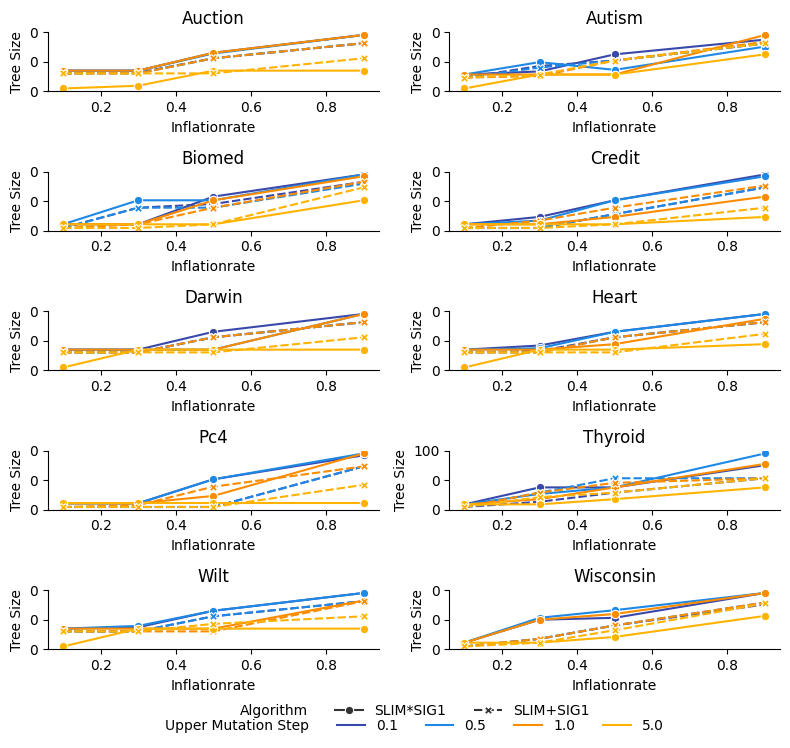

In [4]:
ana_inf.tree_size_by_p_inflate_plot[0]

In [5]:
ana_inf.tradeoff_table

Dataset    Version Inflationrate      Upper MS         RMSE          \
                                     R    T        R    T       R       T   
0     Auction  SLIM*SIG1           0.9  0.3      1.0  5.0  0.3322  0.3371   
1     Auction  SLIM+SIG1           0.9  0.5      1.0  5.0  0.3300  0.3332   
2      Autism  SLIM*SIG1           0.5  0.5      5.0  5.0  0.3580  0.3580   
3      Autism  SLIM+SIG1           0.9  0.3      5.0  5.0  0.3136  0.3576   
4      Biomed  SLIM*SIG1           0.9  0.3      1.0  1.0  0.3527  0.3551   
5      Biomed  SLIM+SIG1           0.9  0.3      5.0  5.0  0.3184  0.3193   
6      Credit  SLIM*SIG1           0.9  0.5      1.0  1.0  0.4020  0.4023   
7      Credit  SLIM+SIG1           0.9  0.3      5.0  5.0  0.4027  0.4031   
8      Darwin  SLIM*SIG1           0.3  0.3      1.0  1.0  0.4534  0.4534   
9      Darwin  SLIM+SIG1           0.3  0.3      5.0  5.0  0.4560  0.4560   
10      Heart  SLIM*SIG1           0.5  0.5      5.0  5.0  0.4467  0.4467   
11      Heart  SLIM+SIG1           0.5  0.5      5.0  5.0  0.4331  0.4331   
12        Pc4  SLIM*SIG1           0.9  0.5      1.0  1.0  0.3319  0.3350   
13        Pc4  SLIM+SIG1           0.9  0.3      5.0  5.0  0.3312  0.3349   
14    Thyroid  SLIM*SIG1           0.3  0.3      5.0  5.0  0.3277  0.3277   
15    Thyroid  SLIM+SIG1           0.5  0.3      5.0  5.0  0.3167  0.3175   
16       Wilt  SLIM*SIG1           0.3  0.3      1.0  1.0  0.1291  0.1291   
17       Wilt  SLIM+SIG1           0.9  0.5      5.0  5.0  0.1291  0.1293   
18  Wisconsin  SLIM*SIG1           0.5  0.5      5.0  5.0  0.3142  0.3142   
19  Wisconsin  SLIM+SIG1           0.9  0.3      5.0  5.0  0.3002  0.3060   

    RMSE % Tree Size       Tree Size %  
                   R     T              
0    +1.5%      42.0   5.0      -88.1%  
1    +0.9%      36.0  14.0      -61.1%  
2    +0.0%      16.0  16.0        0.0%  
3   +14.0%      36.0  16.0      -55.6%  
4    +0.7%      42.0  16.0      -61.9%  
5    +0.3%      36.0  14.0      -61.1%  
6    +0.1%      31.0  20.0      -35.5%  
7    +0.1%      25.0  14.0      -44.0%  
8    +0.0%      16.0  16.0        0.0%  
9    +0.0%      14.0  14.0        0.0%  
10   +0.0%      16.0  16.0        0.0%  
11   +0.0%      14.0  14.0        0.0%  
12   +0.9%      43.0  20.0      -53.5%  
13   +1.1%      26.0  14.0      -46.2%  
14   +0.0%      16.0  16.0        0.0%  
15   +0.3%      25.0  21.5      -14.0%  
16   +0.0%      16.0  16.0        0.0%  
17   +0.2%      25.0  19.5      -22.0%  
18   +0.0%      19.0  19.0        0.0%  
19   +1.9%      36.5  16.0      -56.2%

In [6]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.33400483193010755

In [7]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']
X['comb'] = X['config.p_inflate'] * X['config.ms_upper']
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# --- Linear Model ---
model_linear = sm.OLS(y_train, X_train_const).fit()
y_pred_linear = model_linear.predict(X_test_const)
r2_linear = model_linear.rsquared  # training R²

print("\n=== Linear Model Summary ===")
print(model_linear.summary())
print(f"\nLinear Model R² on test set: {r2_linear:.4f}")
# --- Exponential Model (log-transformed y) ---
log_y_train = np.log(y_train)
model_exp = sm.OLS(log_y_train, X_train_const).fit()
log_y_pred_exp = model_exp.predict(X_test_const)
y_pred_exp = np.exp(log_y_pred_exp)
r2_exp = 1 - np.sum((y_test - y_pred_exp)**2) / np.sum((y_test - np.mean(y_test))**2)

print("\n=== Exponential Model Summary ===")
print(model_exp.summary())
print(f"\nExponential Model R² on test set: {r2_exp:.4f}")


=== Linear Model Summary ===
                            OLS Regression Results                            
Dep. Variable:            nodes_count   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1401.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:57:51   Log-Likelihood:                -29766.
No. Observations:                7680   AIC:                         5.954e+04
Df Residuals:                    7676   BIC:                         5.957e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

C:\Users\leond\AppData\Local\Temp\ipykernel_5844\2780955753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['comb'] = X['config.p_inflate'] * X['config.ms_upper']


In [8]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper']]
y = ana_inf.results['nodes_count']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Robust model (Huber Regression)
hub_reg = HuberRegressor()
hub_reg.fit(X_train, y_train)

# Predictions
y_pred_hub = hub_reg.predict(X_test)

# R^2 score
r2_hub = r2_score(y_test, y_pred_hub)

print(f"Robust Regression (Huber) R²: {r2_hub:.4f}")


Robust Regression (Huber) R²: 0.2693


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare features and target
X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm']]
X = pd.get_dummies(X, columns=['dataset', 'algorithm'], prefix='dataset', drop_first=True)
y = ana_inf.results['nodes_count']

# Log-transform the target variable
log_y = np.log(y)

# Train-test split (80/20)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, log_y, test_size=0.2, random_state=42)

# Fit linear model on log-transformed y
lr = LinearRegression()
lr.fit(X_train, y_train_log)

# Predict log(y) and exponentiate to get predictions in original scale
log_y_pred_test = lr.predict(X_test)
y_pred_test = np.exp(log_y_pred_test)
y_test_original = np.exp(y_test_log)

# R² score on original scale
r2 = r2_score(y_test_original, y_pred_test)
print("Exponential model R² (test set):", r2)


Exponential model R² (test set): 0.2555371889189566


In [10]:
lr.coef_, lr.intercept_

(array([ 1.22426312, -0.08146814,  0.17997009,  0.26779292,  0.06729078,
        -0.0478557 ,  0.1327047 ,  0.03592377,  0.32651668,  0.01412419,
         0.29995406, -0.02129816]),
 2.4396375273070854)

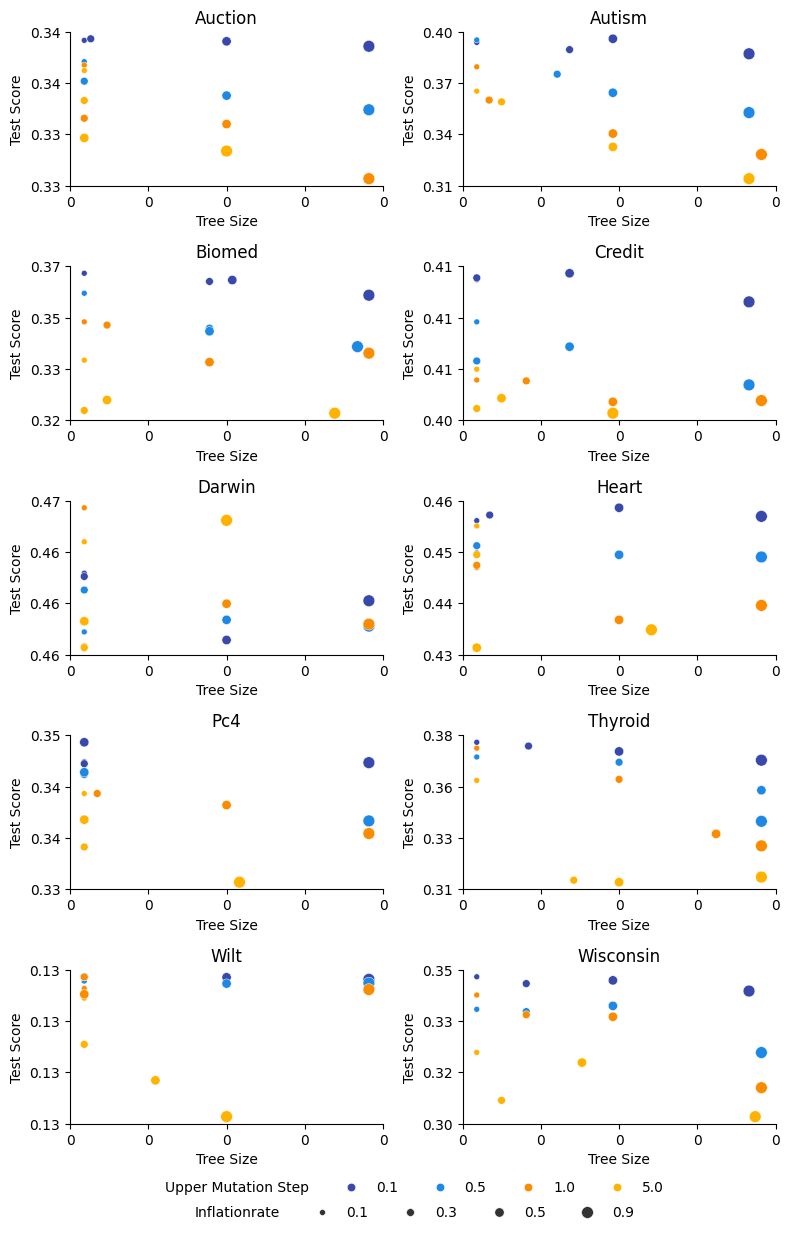

In [11]:
ana_inf.performance_complexity_tradeoff_plussig1_plot[0]

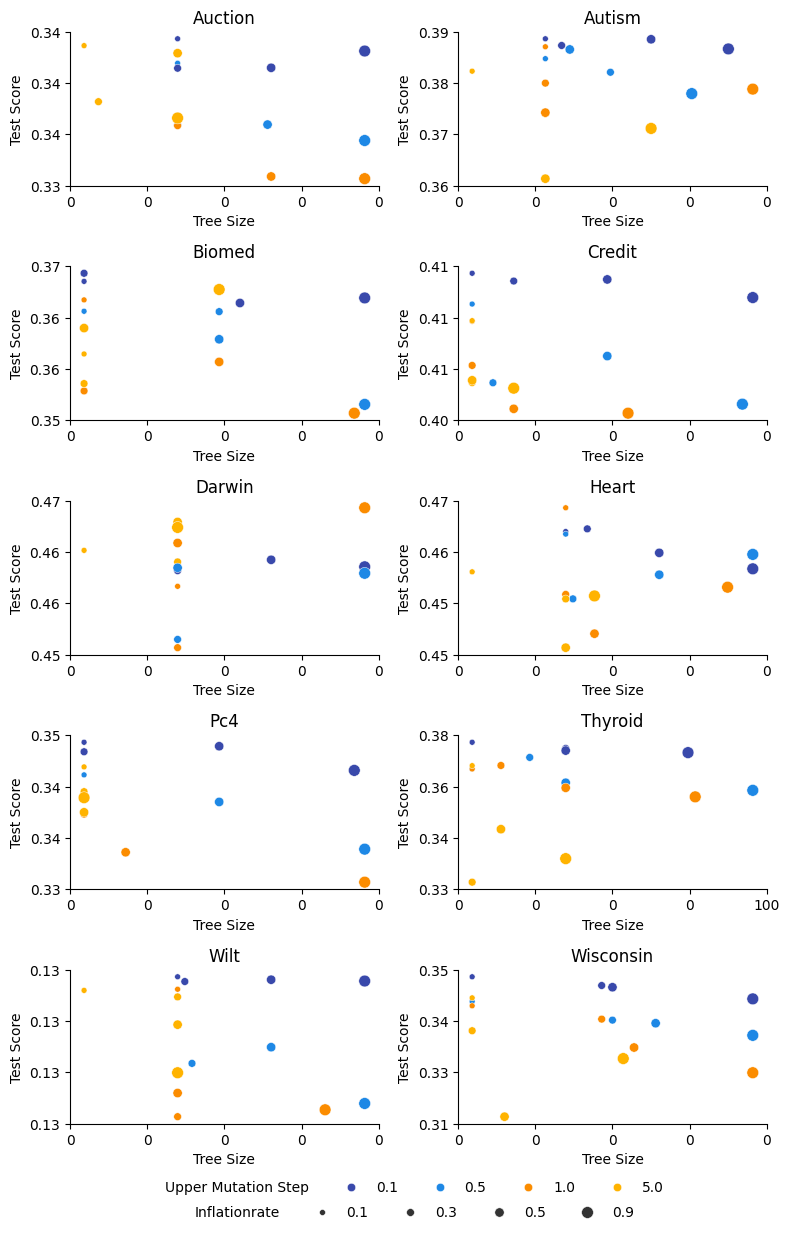

In [12]:
ana_inf.performance_complexity_tradeoff_mulsig1_plot[0]

In [13]:
best = get_best_config_performance_by_p_inflate_and_ms_upper(ana_inf.results)
best_perf = pd.merge(best, ana_inf.results_median[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset', 'algorithm', 'test.rmse', 'nodes_count']], on=['config_id', 'dataset'], how='left')
best_perf = best_perf[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse', 'nodes_count']].copy()
best_perf['test.rmse'] = best_perf['test.rmse'].round(5)
best_perf

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.9,1.0,0.33216,42.0
1,Auction,SLIM+SIG1,0.9,1.0,0.33003,36.0
2,Autism,SLIM*SIG1,0.5,5.0,0.35798,16.0
3,Autism,SLIM+SIG1,0.9,5.0,0.31360,36.0
4,Biomed,SLIM*SIG1,0.9,1.0,0.35273,42.0
5,Biomed,SLIM+SIG1,0.9,5.0,0.31837,36.0
6,Credit,SLIM*SIG1,0.9,1.0,0.40201,31.0
7,Credit,SLIM+SIG1,0.9,5.0,0.40275,25.0
8,Darwin,SLIM*SIG1,0.3,1.0,0.45338,16.0
9,Darwin,SLIM+SIG1,0.3,5.0,0.45598,14.0


In [14]:
best_trade = ana_inf.best_config_results_median[['dataset', 'algorithm', 'config.p_inflate', 'config.ms_upper', 'test.rmse',  'nodes_count']].copy()

best_trade['test.rmse'] = best_trade['test.rmse'].round(5)
best_trade

,dataset,algorithm,config.p_inflate,config.ms_upper,test.rmse,nodes_count
0,Auction,SLIM*SIG1,0.3,5.0,0.33709,5.0
1,Auction,SLIM+SIG1,0.5,5.0,0.33316,14.0
2,Autism,SLIM*SIG1,0.5,5.0,0.35798,16.0
3,Autism,SLIM+SIG1,0.3,5.0,0.35760,16.0
4,Biomed,SLIM*SIG1,0.3,1.0,0.35512,16.0
5,Biomed,SLIM+SIG1,0.3,5.0,0.31931,14.0
6,Credit,SLIM*SIG1,0.5,1.0,0.40231,20.0
7,Credit,SLIM+SIG1,0.3,5.0,0.40307,14.0
8,Darwin,SLIM*SIG1,0.3,1.0,0.45338,16.0
9,Darwin,SLIM+SIG1,0.3,5.0,0.45598,14.0


In [15]:
best = pd.merge(best_perf, best_trade,  on=['dataset', 'algorithm'], how='left')
best['rmse_percentage'] = ((best['test.rmse_y'] - best['test.rmse_x']) / best['test.rmse_x']) * 100
best['rmse_percentage'] = '+' + best['rmse_percentage'].round(3).astype('str') + '%'

best['nodes_count_percentage'] = (best['nodes_count_y'] -best['nodes_count_x'] ) / best['nodes_count_x'] * 100
best['nodes_count_percentage'] = best['nodes_count_percentage'].round(3).astype('str') + '%'


best

,dataset,algorithm,config.p_inflate_x,config.ms_upper_x,test.rmse_x,nodes_count_x,config.p_inflate_y,config.ms_upper_y,test.rmse_y,nodes_count_y,rmse_percentage,nodes_count_percentage
0,Auction,SLIM*SIG1,0.9,1.0,0.33216,42.0,0.3,5.0,0.33709,5.0,+1.484%,-88.095%
1,Auction,SLIM+SIG1,0.9,1.0,0.33003,36.0,0.5,5.0,0.33316,14.0,+0.948%,-61.111%
2,Autism,SLIM*SIG1,0.5,5.0,0.35798,16.0,0.5,5.0,0.35798,16.0,+0.0%,0.0%
3,Autism,SLIM+SIG1,0.9,5.0,0.31360,36.0,0.3,5.0,0.35760,16.0,+14.031%,-55.556%
4,Biomed,SLIM*SIG1,0.9,1.0,0.35273,42.0,0.3,1.0,0.35512,16.0,+0.678%,-61.905%
5,Biomed,SLIM+SIG1,0.9,5.0,0.31837,36.0,0.3,5.0,0.31931,14.0,+0.295%,-61.111%
6,Credit,SLIM*SIG1,0.9,1.0,0.40201,31.0,0.5,1.0,0.40231,20.0,+0.075%,-35.484%
7,Credit,SLIM+SIG1,0.9,5.0,0.40275,25.0,0.3,5.0,0.40307,14.0,+0.079%,-44.0%
8,Darwin,SLIM*SIG1,0.3,1.0,0.45338,16.0,0.3,1.0,0.45338,16.0,+0.0%,0.0%
9,Darwin,SLIM+SIG1,0.3,5.0,0.45598,14.0,0.3,5.0,0.45598,14.0,+0.0%,0.0%


In [16]:
# Keep dataset and algorithm first
best = best[[
    'dataset', 'algorithm',
    'config.p_inflate_x', 'config.p_inflate_y',
    'config.ms_upper_x', 'config.ms_upper_y',
    'test.rmse_x', 'test.rmse_y',
    'nodes_count_x', 'nodes_count_y',
    'rmse_percentage', 'nodes_count_percentage'
]]

# Assign MultiIndex to all except 'dataset' and 'algorithm'
multi_cols = pd.MultiIndex.from_tuples([
    ('dataset', ''), ('algorithm', ''),
    ('config.p_inflate', ' RMSE'), ('config.p_inflate', ' Tradeoff'),
    ('config.ms_upper', ' RMSE'), ('config.ms_upper', ' Tradeoff'),
    ('test.rmse', ' RMSE'), ('test.rmse', ' Tradeoff'),
    ('nodes_count', ' RMSE'), ('nodes_count', ' Tradeoff'),
    ('rmse_percentage', ''), ('nodes_count_percentage', '')
])

best.columns = multi_cols

best


dataset  algorithm config.p_inflate           config.ms_upper            \
                                     RMSE  Tradeoff            RMSE  Tradeoff   
0     Auction  SLIM*SIG1              0.9       0.3             1.0       5.0   
1     Auction  SLIM+SIG1              0.9       0.5             1.0       5.0   
2      Autism  SLIM*SIG1              0.5       0.5             5.0       5.0   
3      Autism  SLIM+SIG1              0.9       0.3             5.0       5.0   
4      Biomed  SLIM*SIG1              0.9       0.3             1.0       1.0   
5      Biomed  SLIM+SIG1              0.9       0.3             5.0       5.0   
6      Credit  SLIM*SIG1              0.9       0.5             1.0       1.0   
7      Credit  SLIM+SIG1              0.9       0.3             5.0       5.0   
8      Darwin  SLIM*SIG1              0.3       0.3             1.0       1.0   
9      Darwin  SLIM+SIG1              0.3       0.3             5.0       5.0   
10      Heart  SLIM*SIG1              0.5       0.5             5.0       5.0   
11      Heart  SLIM+SIG1              0.5       0.5             5.0       5.0   
12        Pc4  SLIM*SIG1              0.9       0.5             1.0       1.0   
13        Pc4  SLIM+SIG1              0.9       0.3             5.0       5.0   
14    Thyroid  SLIM*SIG1              0.3       0.3             5.0       5.0   
15    Thyroid  SLIM+SIG1              0.5       0.3             5.0       5.0   
16       Wilt  SLIM*SIG1              0.3       0.3             1.0       1.0   
17       Wilt  SLIM+SIG1              0.9       0.5             5.0       5.0   
18  Wisconsin  SLIM*SIG1              0.5       0.5             5.0       5.0   
19  Wisconsin  SLIM+SIG1              0.9       0.3             5.0       5.0   

   test.rmse           nodes_count           rmse_percentage  \
        RMSE  Tradeoff        RMSE  Tradeoff                   
0    0.33216   0.33709        42.0       5.0         +1.484%   
1    0.33003   0.33316        36.0      14.0         +0.948%   
2    0.35798   0.35798        16.0      16.0           +0.0%   
3    0.31360   0.35760        36.0      16.0        +14.031%   
4    0.35273   0.35512        42.0      16.0         +0.678%   
5    0.31837   0.31931        36.0      14.0         +0.295%   
6    0.40201   0.40231        31.0      20.0         +0.075%   
7    0.40275   0.40307        25.0      14.0         +0.079%   
8    0.45338   0.45338        16.0      16.0           +0.0%   
9    0.45598   0.45598        14.0      14.0           +0.0%   
10   0.44667   0.44667        16.0      16.0           +0.0%   
11   0.43311   0.43311        14.0      14.0           +0.0%   
12   0.33192   0.33500        43.0      20.0         +0.928%   
13   0.33118   0.33491        26.0      14.0         +1.126%   
14   0.32775   0.32775        16.0      16.0           +0.0%   
15   0.31668   0.31748        25.0      21.5         +0.253%   
16   0.12909   0.12909        16.0      16.0           +0.0%   
17   0.12907   0.12935        25.0      19.5         +0.217%   
18   0.31422   0.31422        19.0      19.0           +0.0%   
19   0.30017   0.30600        36.5      16.0         +1.942%   

   nodes_count_percentage  
                           
0                -88.095%  
1                -61.111%  
2                    0.0%  
3                -55.556%  
4                -61.905%  
5                -61.111%  
6                -35.484%  
7                  -44.0%  
8                    0.0%  
9                    0.0%  
10                   0.0%  
11                   0.0%  
12               -53.488%  
13               -46.154%  
14                   0.0%  
15                 -14.0%  
16                   0.0%  
17                 -22.0%  
18                   0.0%  
19               -56.164%

In [17]:
best.rename(columns={'algorithm': 'Version',
                     'config.p_inflate': 'Inflationrate',
                        'config.ms_upper': 'Upper MS',
                        'test.rmse': 'RMSE',
                        'nodes_count': 'Tree Size',
                        'rmse_percentage': 'RMSE %',
                        'nodes_count_percentage': 'Tree Size %'
                     }, inplace=True)
best

dataset    Version Inflationrate           Upper MS               RMSE  \
                                  RMSE  Tradeoff     RMSE  Tradeoff     RMSE   
0     Auction  SLIM*SIG1           0.9       0.3      1.0       5.0  0.33216   
1     Auction  SLIM+SIG1           0.9       0.5      1.0       5.0  0.33003   
2      Autism  SLIM*SIG1           0.5       0.5      5.0       5.0  0.35798   
3      Autism  SLIM+SIG1           0.9       0.3      5.0       5.0  0.31360   
4      Biomed  SLIM*SIG1           0.9       0.3      1.0       1.0  0.35273   
5      Biomed  SLIM+SIG1           0.9       0.3      5.0       5.0  0.31837   
6      Credit  SLIM*SIG1           0.9       0.5      1.0       1.0  0.40201   
7      Credit  SLIM+SIG1           0.9       0.3      5.0       5.0  0.40275   
8      Darwin  SLIM*SIG1           0.3       0.3      1.0       1.0  0.45338   
9      Darwin  SLIM+SIG1           0.3       0.3      5.0       5.0  0.45598   
10      Heart  SLIM*SIG1           0.5       0.5      5.0       5.0  0.44667   
11      Heart  SLIM+SIG1           0.5       0.5      5.0       5.0  0.43311   
12        Pc4  SLIM*SIG1           0.9       0.5      1.0       1.0  0.33192   
13        Pc4  SLIM+SIG1           0.9       0.3      5.0       5.0  0.33118   
14    Thyroid  SLIM*SIG1           0.3       0.3      5.0       5.0  0.32775   
15    Thyroid  SLIM+SIG1           0.5       0.3      5.0       5.0  0.31668   
16       Wilt  SLIM*SIG1           0.3       0.3      1.0       1.0  0.12909   
17       Wilt  SLIM+SIG1           0.9       0.5      5.0       5.0  0.12907   
18  Wisconsin  SLIM*SIG1           0.5       0.5      5.0       5.0  0.31422   
19  Wisconsin  SLIM+SIG1           0.9       0.3      5.0       5.0  0.30017   

             Tree Size              RMSE % Tree Size %  
    Tradeoff      RMSE  Tradeoff                        
0    0.33709      42.0       5.0   +1.484%    -88.095%  
1    0.33316      36.0      14.0   +0.948%    -61.111%  
2    0.35798      16.0      16.0     +0.0%        0.0%  
3    0.35760      36.0      16.0  +14.031%    -55.556%  
4    0.35512      42.0      16.0   +0.678%    -61.905%  
5    0.31931      36.0      14.0   +0.295%    -61.111%  
6    0.40231      31.0      20.0   +0.075%    -35.484%  
7    0.40307      25.0      14.0   +0.079%      -44.0%  
8    0.45338      16.0      16.0     +0.0%        0.0%  
9    0.45598      14.0      14.0     +0.0%        0.0%  
10   0.44667      16.0      16.0     +0.0%        0.0%  
11   0.43311      14.0      14.0     +0.0%        0.0%  
12   0.33500      43.0      20.0   +0.928%    -53.488%  
13   0.33491      26.0      14.0   +1.126%    -46.154%  
14   0.32775      16.0      16.0     +0.0%        0.0%  
15   0.31748      25.0      21.5   +0.253%      -14.0%  
16   0.12909      16.0      16.0     +0.0%        0.0%  
17   0.12935      25.0      19.5   +0.217%      -22.0%  
18   0.31422      19.0      19.0     +0.0%        0.0%  
19   0.30600      36.5      16.0   +1.942%    -56.164%

In [18]:
get_min_euclidian_distance(ana_inf.results)

c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experiments\analysis.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['euclidian_distance'] = (subset['test.rmse']**2 + 2*subset['nodes_count']**2)**0.5
c:\Users\leond\OneDrive\Desktop\MasterThesis\slim\mastero\experime

,config_id,run_id,nodes_count,algorithm,scaling,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,...,train.recall,test.rmse,test.wrmse,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset,euclidian_distance
0,24,17,0.203125,SLIM*SIG1,True,False,100,4,True,1,...,0.163934,0.000000,0.556316,0.902121,0.735054,0.400000,0.952381,0.253165,Auction,0.287262
1,48,17,0.148649,SLIM+SIG1,True,False,100,4,True,1,...,0.464481,0.254354,0.510559,0.861338,0.735054,0.497041,0.466667,0.531646,Auction,0.329983
2,32,3,0.158537,SLIM*SIG1,True,False,100,4,True,1,...,1.000000,0.000000,0.087967,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.224205
3,40,27,0.118280,SLIM+SIG1,True,False,100,4,True,1,...,1.000000,0.081350,0.185225,1.000000,1.000000,1.000000,1.000000,1.000000,Autism,0.186005
4,24,30,0.068966,SLIM*SIG1,True,False,100,4,True,1,...,0.730769,0.269832,0.359126,0.888889,0.897826,0.829268,0.944444,0.739130,Biomed,0.286918
5,40,13,0.196429,SLIM+SIG1,True,False,100,4,True,1,...,0.730769,0.137110,0.237811,0.920635,0.978261,0.893617,0.875000,0.913043,Biomed,0.309786
6,20,20,0.000000,SLIM*SIG1,True,False,100,4,True,1,...,0.000000,0.088807,0.585337,0.801775,0.535675,0.028986,1.000000,0.014706,Credit,0.088807
7,48,20,0.000000,SLIM+SIG1,True,False,100,4,True,1,...,0.000000,0.020683,0.585337,0.801775,0.535675,0.028986,1.000000,0.014706,Credit,0.020683
8,28,13,0.000000,SLIM*SIG1,True,False,100,4,True,1,...,0.728814,0.018592,0.411293,0.811321,0.829060,0.807692,0.807692,0.807692,Darwin,0.018592
9,44,4,0.103774,SLIM+SIG1,True,False,100,4,True,1,...,0.762712,0.168000,0.386673,0.754717,0.867521,0.754717,0.740741,0.769231,Darwin,0.223074


In [19]:

X = ana_inf.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

KeyError: "['dataset_name', 'name'] not in index"

(array([7003.59709821, -542.20042595]), 137.87880549860574)